In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv("/content/drive/My Drive/Police_Department_Incidents_-_Previous_Year__2016_.csv",dtype={'IncidntNum':'str','PdId':'str'})

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.20058E+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.20058E+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.41059E+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,1/5/2016 0:00,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.60014E+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,1/1/2016 0:00,0:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.60003E+13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  object 
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  object 
dtypes: float64(2), object(11)
memory usage: 14.9+ MB


In [7]:
df.shape

(150500, 13)

In [8]:
df[df['PdDistrict'].isna()]

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
112851,166018573,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,01/17/2016 12:00:00 AM,23:54,NaN,NONE,100 Block of VELASCO AV,-122.413352,37.708202,"(37.7082024584902, -122.413351985284)",1.66019E+13


In [9]:
df.nunique()

IncidntNum    116699
Category          39
Descript         726
DayOfWeek          7
Date             366
Time            1439
PdDistrict        10
Resolution        14
Address        16130
X              18971
Y              19128
Location       19386
PdId            1909
dtype: int64

# **Data Exploration**

In [0]:
def cat_plot(df,col,color='salmon'):
  df_plt = df[col].value_counts().reset_index()
  df_plt.columns = [col,'count']
  plt.figure(figsize=(20,10))
  ax = sns.barplot(x=col,y='count',data=df_plt, color=color)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  plt.show()

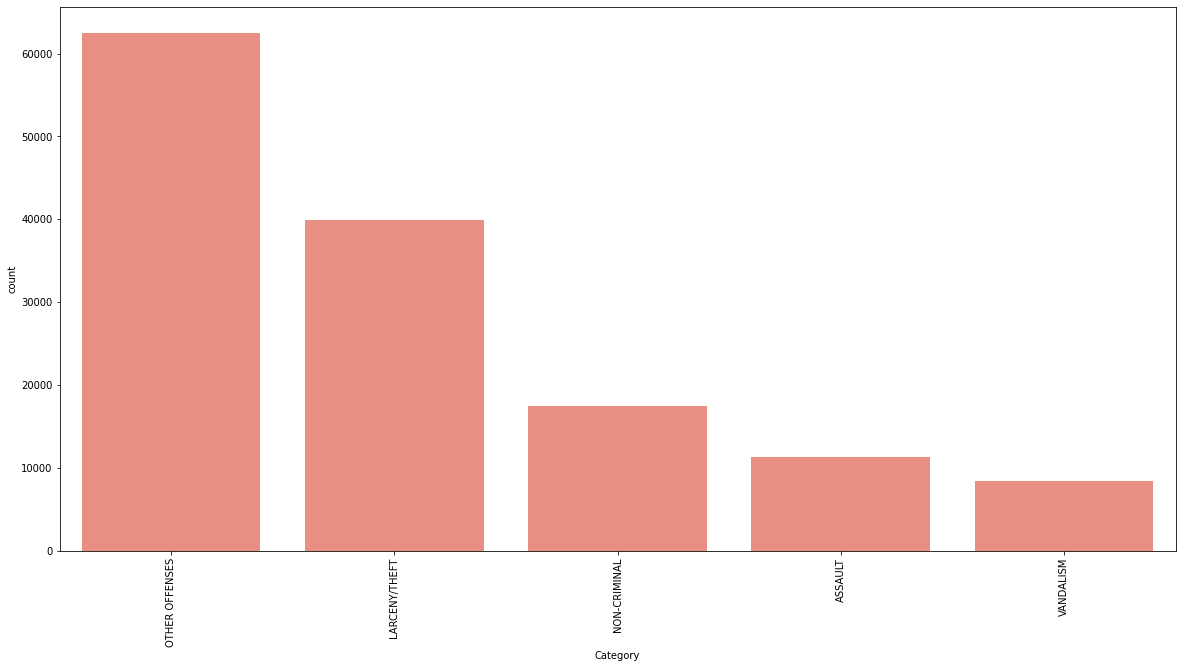

In [46]:
cat_plot(df_dropdup,'Category') #ต้องไปรันขั้นตอน Data Preparationn กับ Modelingก่อน

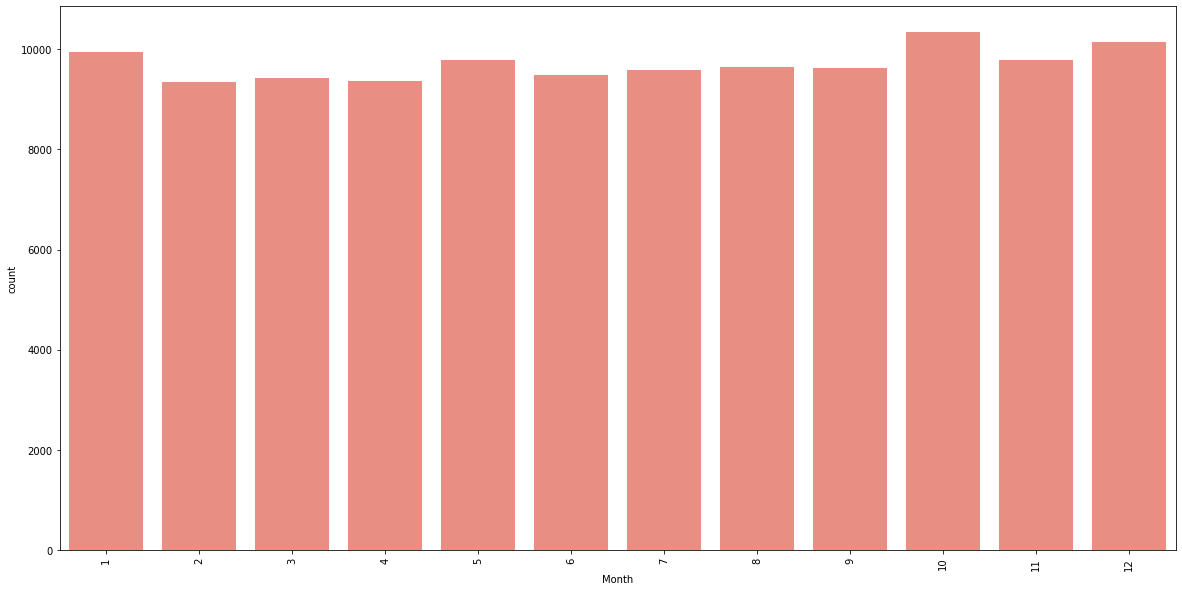

In [50]:
cat_plot(df_dropdup[['IncidntNum','Month']].drop_duplicates(),'Month',color='salmon') #ต้องไปรันขั้นตอน Data Preparationn กับ Modelingก่อน

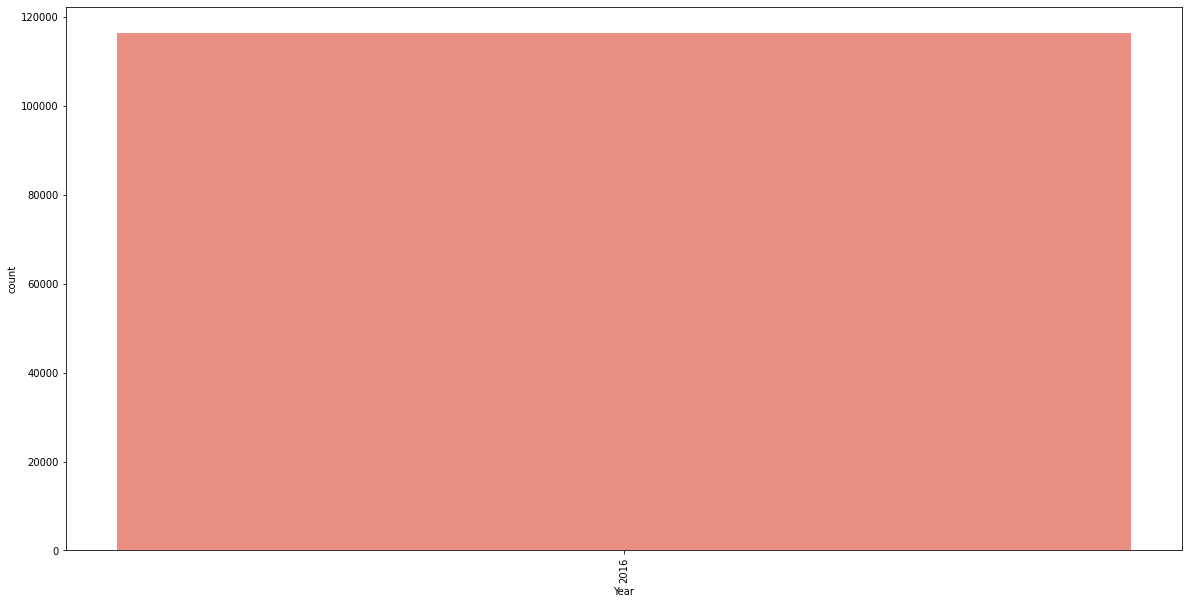

In [51]:
cat_plot(df_dropdup[['IncidntNum','Year']].drop_duplicates(),'Year',color='salmon') #ต้องไปรันขั้นตอน Data Preparationn กับ Modelingก่อน

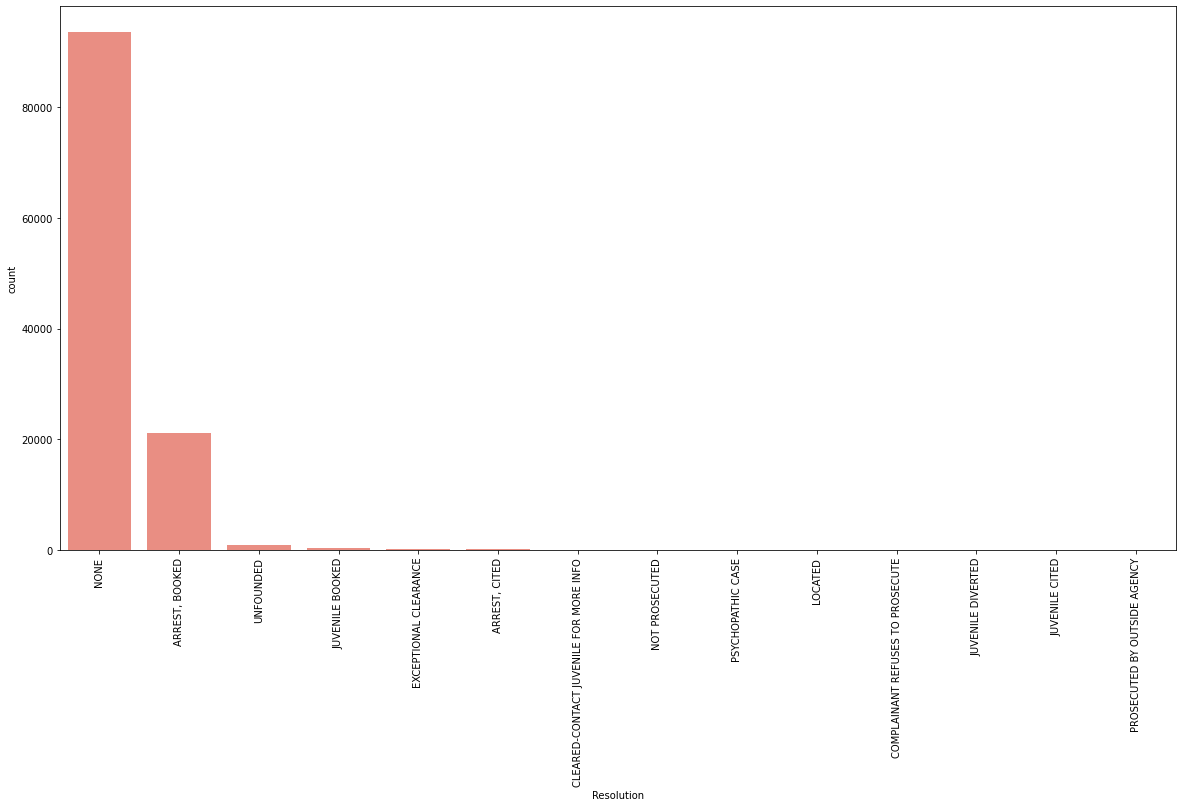

In [52]:
cat_plot(df_dropdup[['IncidntNum','Resolution']].drop_duplicates(),'Resolution',color='salmon') #ต้องไปรันขั้นตอน Data Preparationn กับ Modelingก่อน

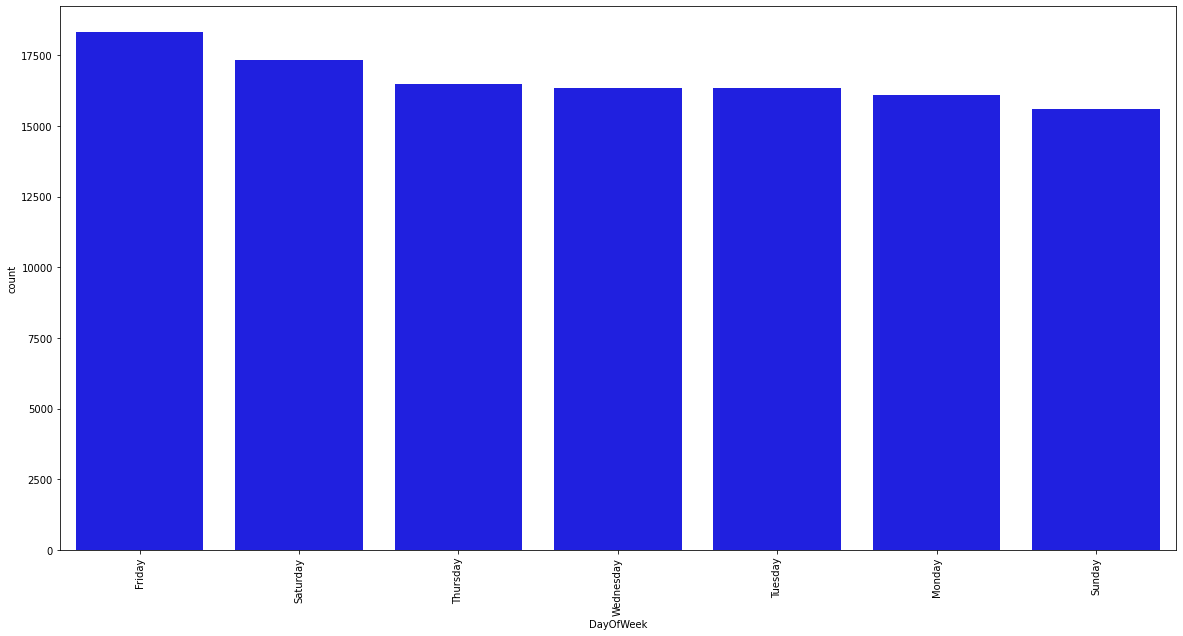

In [0]:
cat_plot(df_dropdup[['IncidntNum','DayOfWeek']].drop_duplicates(),'DayOfWeek',color='blue') #ต้องไปรันขั้นตอน Data Preparationn กับ Modelingก่อน

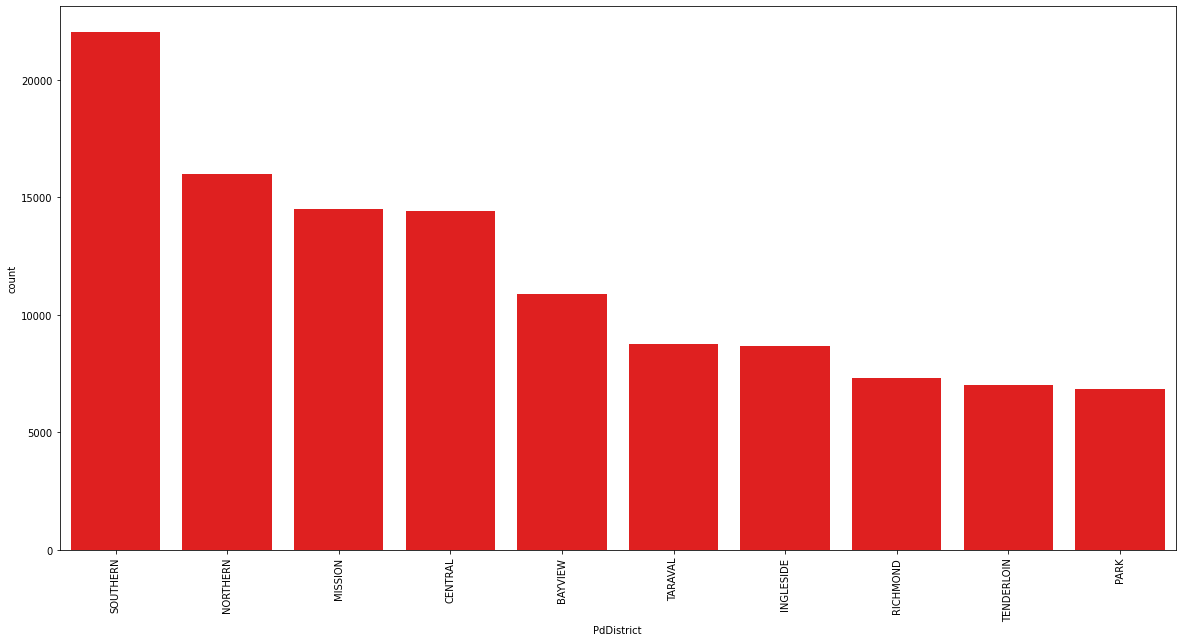

In [0]:
cat_plot(df_dropdup[['IncidntNum','PdDistrict']].drop_duplicates(),'PdDistrict',color = 'red') #ต้องไปรันขั้นตอน Data Preparationn กับ Modelingก่อน

In [0]:
df.Date.sort_values()

23133     01/13/2016 12:00:00 AM
37779     01/13/2016 12:00:00 AM
23119     01/13/2016 12:00:00 AM
23118     01/13/2016 12:00:00 AM
138631    01/13/2016 12:00:00 AM
                   ...          
73705              9/9/2016 0:00
128793             9/9/2016 0:00
127943             9/9/2016 0:00
128752             9/9/2016 0:00
76242              9/9/2016 0:00
Name: Date, Length: 150499, dtype: object

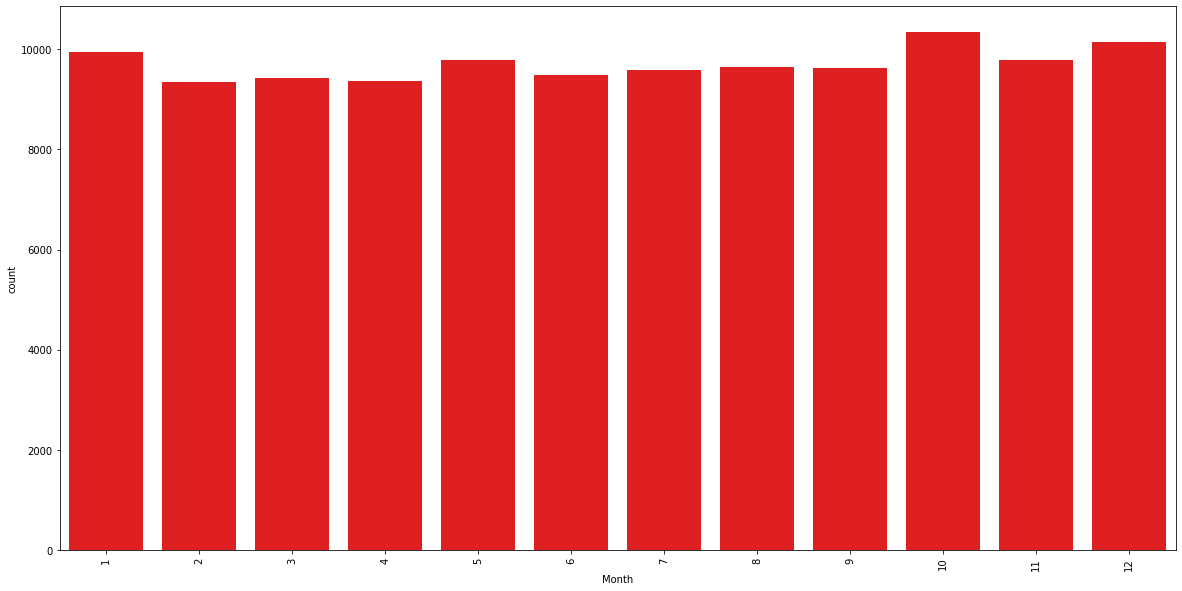

In [0]:
cat_plot(df_dropdup[['IncidntNum','Month']].drop_duplicates(),'Month',color = 'red') #ต้องไปรันขั้นตอน Data Preparationn กับ Modelingก่อน

## **Data Preparation**

### missing data

In [0]:
df = df.loc[~df['PdDistrict'].isna()]

In [11]:
df.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.20058E+13
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",1.20058E+13
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",1.41059E+13
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,1/5/2016 0:00,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",1.60014E+13
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,1/1/2016 0:00,0:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",1.60003E+13


In [0]:
omit = ['Descript']
df_dropdup = df[[col for col in df.columns if col not in omit]].drop_duplicates()

In [43]:
df_dropdup['Month'].value_counts() #ต้องไปรันตอนข้างล่างก่อน

10    12338
12    12036
1     11980
5     11793
11    11720
9     11571
8     11509
3     11382
7     11368
4     11364
6     11257
2     11195
Name: Month, dtype: int64

In [16]:
df_dropdup['DayOfWeek'].value_counts()

Friday       21726
Saturday     20614
Wednesday    19792
Thursday     19760
Tuesday      19727
Monday       19315
Sunday       18808
Name: DayOfWeek, dtype: int64

In [17]:
df_dropdup['PdDistrict'].value_counts()

SOUTHERN      26589
NORTHERN      18848
MISSION       17966
CENTRAL       16782
BAYVIEW       13120
INGLESIDE     10496
TARAVAL       10481
TENDERLOIN     9019
RICHMOND       8462
PARK           7979
Name: PdDistrict, dtype: int64

In [18]:
df_dropdup['Resolution'].value_counts()

NONE                                      103679
ARREST, BOOKED                             33248
UNFOUNDED                                   1334
JUVENILE BOOKED                              926
EXCEPTIONAL CLEARANCE                        321
ARREST, CITED                                134
CLEARED-CONTACT JUVENILE FOR MORE INFO        47
NOT PROSECUTED                                19
PSYCHOPATHIC CASE                             15
LOCATED                                       12
COMPLAINANT REFUSES TO PROSECUTE               2
JUVENILE DIVERTED                              2
JUVENILE CITED                                 2
PROSECUTED BY OUTSIDE AGENCY                   1
Name: Resolution, dtype: int64

In [44]:
df_dropdup['Year'].value_counts() #ต้องไปรันขั้นตอนข้างล่างก่อน

2016    139513
Name: Year, dtype: int64

In [20]:
df_dropdup['IncidntNum'].value_counts()

160107475    8
160044855    8
160174703    7
160618018    7
160325780    7
            ..
160910262    1
160078575    1
166256143    1
160976963    1
166007269    1
Name: IncidntNum, Length: 116698, dtype: int64

In [21]:
df_dropdup.loc[df_dropdup['IncidntNum']=='160044855']

,IncidntNum,Category,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
2226,160044855,VANDALISM,Saturday,01/16/2016 12:00:00 AM,15:30,INGLESIDE,"ARREST, BOOKED",1100 Block of SUNNYDALE AV,-122.412613,37.710901,"(37.7109009555588, -122.412613134752)",1.60045E+13
139655,160044855,ROBBERY,Saturday,01/16/2016 12:00:00 AM,15:30,INGLESIDE,"ARREST, BOOKED",1100 Block of SUNNYDALE AV,-122.412613,37.710901,"(37.7109009555588, -122.412613134752)",1.60045E+13
139656,160044855,ASSAULT,Saturday,01/16/2016 12:00:00 AM,15:30,INGLESIDE,"ARREST, BOOKED",1100 Block of SUNNYDALE AV,-122.412613,37.710901,"(37.7109009555588, -122.412613134752)",1.60045E+13
139657,160044855,BURGLARY,Saturday,01/16/2016 12:00:00 AM,15:30,INGLESIDE,"ARREST, BOOKED",1100 Block of SUNNYDALE AV,-122.412613,37.710901,"(37.7109009555588, -122.412613134752)",1.60045E+13
139658,160044855,STOLEN PROPERTY,Saturday,01/16/2016 12:00:00 AM,15:30,INGLESIDE,"ARREST, BOOKED",1100 Block of SUNNYDALE AV,-122.412613,37.710901,"(37.7109009555588, -122.412613134752)",1.60045E+13
139659,160044855,OTHER OFFENSES,Saturday,01/16/2016 12:00:00 AM,15:30,INGLESIDE,"ARREST, BOOKED",1100 Block of SUNNYDALE AV,-122.412613,37.710901,"(37.7109009555588, -122.412613134752)",1.60045E+13
142897,160044855,KIDNAPPING,Saturday,01/16/2016 12:00:00 AM,15:30,INGLESIDE,"ARREST, BOOKED",1100 Block of SUNNYDALE AV,-122.412613,37.710901,"(37.7109009555588, -122.412613134752)",1.60045E+13
142898,160044855,WARRANTS,Saturday,01/16/2016 12:00:00 AM,15:30,INGLESIDE,"ARREST, BOOKED",1100 Block of SUNNYDALE AV,-122.412613,37.710901,"(37.7109009555588, -122.412613134752)",1.60045E+13


In [22]:
df_dropdup.loc[df_dropdup['PdDistrict']=='INGLESIDE','PdId']

13        1.40777E+13
18        1.60005E+13
29        1.60007E+13
32        1.60139E+13
36        1.60008E+13
             ...     
150361    1.60603E+13
150403    1.60687E+13
150418    1.60773E+13
150454     1.6098E+13
150455     1.6098E+13
Name: PdId, Length: 10496, dtype: object

### outlier

In [23]:
df_dropdup['Category'].value_counts(normalize=True)

LARCENY/THEFT                  0.286149
NON-CRIMINAL                   0.124916
OTHER OFFENSES                 0.122318
ASSAULT                        0.080591
VANDALISM                      0.060426
VEHICLE THEFT                  0.042600
SUSPICIOUS OCC                 0.040732
BURGLARY                       0.040661
WARRANTS                       0.039194
ROBBERY                        0.022971
DRUG/NARCOTIC                  0.021296
MISSING PERSON                 0.019965
FRAUD                          0.018255
SECONDARY CODES                0.013153
TRESPASS                       0.012924
WEAPON LAWS                    0.009310
STOLEN PROPERTY                0.006197
SEX OFFENSES, FORCIBLE         0.005761
RECOVERED VEHICLE              0.005267
DISORDERLY CONDUCT             0.004694
FORGERY/COUNTERFEITING         0.004129
DRUNKENNESS                    0.003328
PROSTITUTION                   0.002741
DRIVING UNDER THE INFLUENCE    0.002598
ARSON                          0.001954


In [24]:
df_dropdup['Category'].unique().tolist()

['WEAPON LAWS',
 'WARRANTS',
 'NON-CRIMINAL',
 'ASSAULT',
 'OTHER OFFENSES',
 'MISSING PERSON',
 'LARCENY/THEFT',
 'BURGLARY',
 'STOLEN PROPERTY',
 'ROBBERY',
 'FRAUD',
 'DRUG/NARCOTIC',
 'VEHICLE THEFT',
 'RECOVERED VEHICLE',
 'VANDALISM',
 'ARSON',
 'PROSTITUTION',
 'SECONDARY CODES',
 'SUSPICIOUS OCC',
 'DRUNKENNESS',
 'TRESPASS',
 'SEX OFFENSES, NON FORCIBLE',
 'SEX OFFENSES, FORCIBLE',
 'RUNAWAY',
 'KIDNAPPING',
 'DISORDERLY CONDUCT',
 'DRIVING UNDER THE INFLUENCE',
 'FORGERY/COUNTERFEITING',
 'EMBEZZLEMENT',
 'BRIBERY',
 'FAMILY OFFENSES',
 'GAMBLING',
 'SUICIDE',
 'LIQUOR LAWS',
 'EXTORTION',
 'LOITERING',
 'TREA',
 'BAD CHECKS',
 'PORNOGRAPHY/OBSCENE MAT']

In [25]:
tmp =  df_dropdup['Category'].value_counts(normalize=True).reset_index(name='ratio')
other_cols = tmp.loc[tmp['ratio']<0.05,'index'].unique()
df_dropdup.loc[df_dropdup['Category'].isin(other_cols),'Category'] = 'OTHER OFFENSES'
df_dropdup['Category'].value_counts(normalize=True)

OTHER OFFENSES    0.447918
LARCENY/THEFT     0.286149
NON-CRIMINAL      0.124916
ASSAULT           0.080591
VANDALISM         0.060426
Name: Category, dtype: float64

In [26]:
df_dropdup['Category'].value_counts()

OTHER OFFENSES    62593
LARCENY/THEFT     39987
NON-CRIMINAL      17456
ASSAULT           11262
VANDALISM          8444
Name: Category, dtype: int64

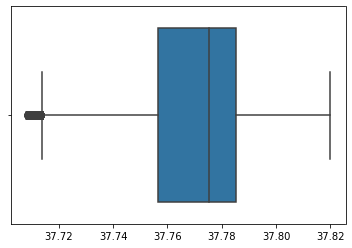

In [27]:
sns.boxplot(df_dropdup[["Y"]])

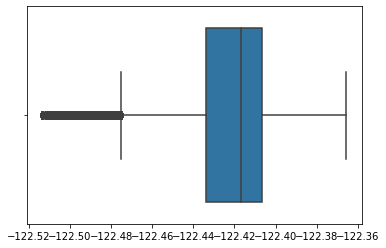

In [28]:
sns.boxplot(df_dropdup[["X"]])

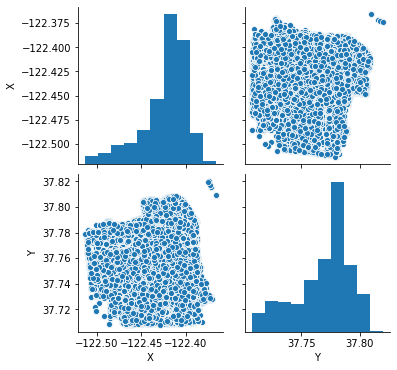

In [29]:
sns.pairplot(df_dropdup[["X", "Y"]])

In [0]:
df_dropdup = df_dropdup.loc[~((df_dropdup['X']>-122.374)&(df_dropdup['Y']>37.80)),:]

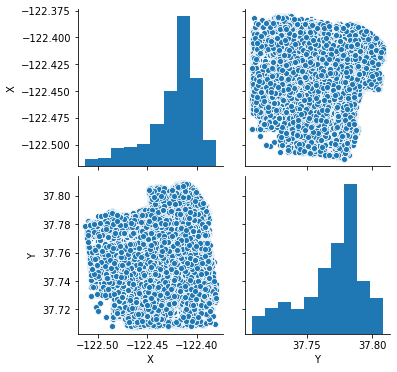

In [60]:
sns.pairplot(df_dropdup[["X", "Y"]])

### transform data

In [0]:
def transformDataset(dataset):
    dataset['Dates'] =  pd.to_datetime(dataset['Date'])
    dataset['Date'] = dataset['Dates'].dt.date
    dataset['DayOfYear'] = (dataset['Date'] - dataset['Date'].min()).apply(lambda x: x.days)
    
    dataset['Year'] = dataset['Dates'].dt.year
    dataset['DayOfWeek'] = dataset['Dates'].dt.dayofweek # OVERWRITE
    dataset['WeekOfYear'] = dataset['Dates'].dt.weekofyear
    dataset['DayOfMonth'] = dataset['Dates'].dt.day
    dataset['Month'] = dataset['Dates'].dt.month
    
    dataset['Hour'] = dataset['Time'].str.split(':').str[0].astype(int)
    
    dataset['Block'] = dataset['Address'].str.contains('block', case=False)
    dataset['Block'] = dataset['Block'].map(lambda x: 1 if  x == True else 0)

    for cd in ['ST','DR','AV']:
      cond = (dataset['Address'].str.contains(f' {cd} '))|(dataset['Address'].str.endswith(f' {cd}'))
      dataset.loc[cond,f'addr_{cd}'] = 1

    dataset = dataset.fillna(0)

    dataset = dataset.drop('Dates', 1)
    dataset = dataset.drop('Date', 1)
    dataset = dataset.drop('Address', 1)
    
    dataset = pd.get_dummies(data=dataset, columns=[ 'PdDistrict'], drop_first = True)
    return dataset

In [33]:
dfm = transformDataset(df_dropdup)
columns = [
 'Category',
 'DayOfWeek',
 'X',
 'Y',
 'DayOfYear',
 'Year',
 'WeekOfYear',
 'Month',
 'Hour',
 'Block',
 'addr_ST',
 'addr_DR',
 'addr_AV',
 'DayOfMonth',
 'PdDistrict_CENTRAL',
 'PdDistrict_INGLESIDE',
 'PdDistrict_MISSION',
 'PdDistrict_NORTHERN',
 'PdDistrict_PARK',
 'PdDistrict_RICHMOND',
 'PdDistrict_SOUTHERN',
 'PdDistrict_TARAVAL',
 'PdDistrict_TENDERLOIN']
dfm = dfm[columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [34]:
dfm.head()

,Category,DayOfWeek,X,Y,DayOfYear,Year,WeekOfYear,Month,Hour,Block,addr_ST,addr_DR,addr_AV,DayOfMonth,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,OTHER OFFENSES,4,-122.403405,37.775421,28,2016,4,1,11,1,1.0,0.0,0.0,29,0,0,0,0,0,0,1,0,0
2,OTHER OFFENSES,0,-122.388856,37.729981,115,2016,17,4,14,0,1.0,0.0,1.0,25,0,0,0,0,0,0,0,0,0
3,NON-CRIMINAL,1,-122.412971,37.785788,4,2016,1,1,23,0,1.0,0.0,0.0,5,0,0,0,0,0,0,0,0,1
4,NON-CRIMINAL,4,-122.419672,37.765050,0,2016,53,1,0,0,1.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0
5,ASSAULT,4,-122.426077,37.788019,0,2016,53,1,21,1,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0


# Modeling

In [0]:
month = 9
df_train = dfm[dfm['Month'] < month]
df_test = dfm[dfm['Month'] == month]

In [36]:
df_train.shape

(91848, 23)

In [37]:
df_test.shape

(11571, 23)

In [0]:
target_cols = 'Category'
X_train = df_train[[col for col in df_train.columns if col != target_cols]]
y_train = df_train[target_cols]
X_test = df_test[[col for col in df_test.columns if col != target_cols]]
y_test = df_test[target_cols]

### Decision Tree

In [0]:
def modeling(dfm,month):
  df_train = dfm[dfm['Month'] < month]
  df_test = dfm[dfm['Month'] == month]
  target_cols = 'Category'
  X_train = df_train[[col for col in df_train.columns if col != target_cols]]
  y_train = df_train[target_cols]
  X_test = df_test[[col for col in df_test.columns if col != target_cols]]
  y_test = df_test[target_cols]
  
  ##
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.metrics import classification_report
  from sklearn.metrics import confusion_matrix
  dtree = DecisionTreeClassifier()
  dtree.fit(X_train,y_train)
  predictions = dtree.predict(X_test)
  ##

# feature importance ฟีเจอที่ส่งผลต่อโมเดลเรามากที่สุด
  for feature,imp in zip(X_train.columns,dtree.feature_importances_):
    print([feature,"%.4f"%imp])


  print (classification_report(y_test,predictions))

  labels = pd.Series(predictions).sort_values().unique().tolist()
  cm = confusion_matrix(y_test,predictions, labels=labels)
  fig, ax = plt.subplots(figsize=(20, 20))
  sns.heatmap(cm, annot=False, ax = ax); #annot=True to annotate cells
  ax.set_yticklabels(labels)
  ax.set_xticklabels(labels)
  ax.set_yticklabels(ax.get_yticklabels(),rotation=0)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 

Evaluation





['DayOfWeek', '0.0832']
['X', '0.1943']
['Y', '0.2083']
['WeekOfYear', '0.0642']
['Month', '0.0289']
['Hour', '0.1372']
['Block', '0.0156']
['DayOfYear', '0.1252']
['DayOfMonth', '0.1430']
                precision    recall  f1-score   support

       ASSAULT       0.12      0.15      0.13      1002
 LARCENY/THEFT       0.36      0.39      0.37      3302
  NON-CRIMINAL       0.14      0.19      0.16      1461
OTHER OFFENSES       0.47      0.36      0.41      5070
     VANDALISM       0.08      0.10      0.09       736

      accuracy                           0.31     11571
     macro avg       0.23      0.24      0.23     11571
  weighted avg       0.34      0.31      0.32     11571



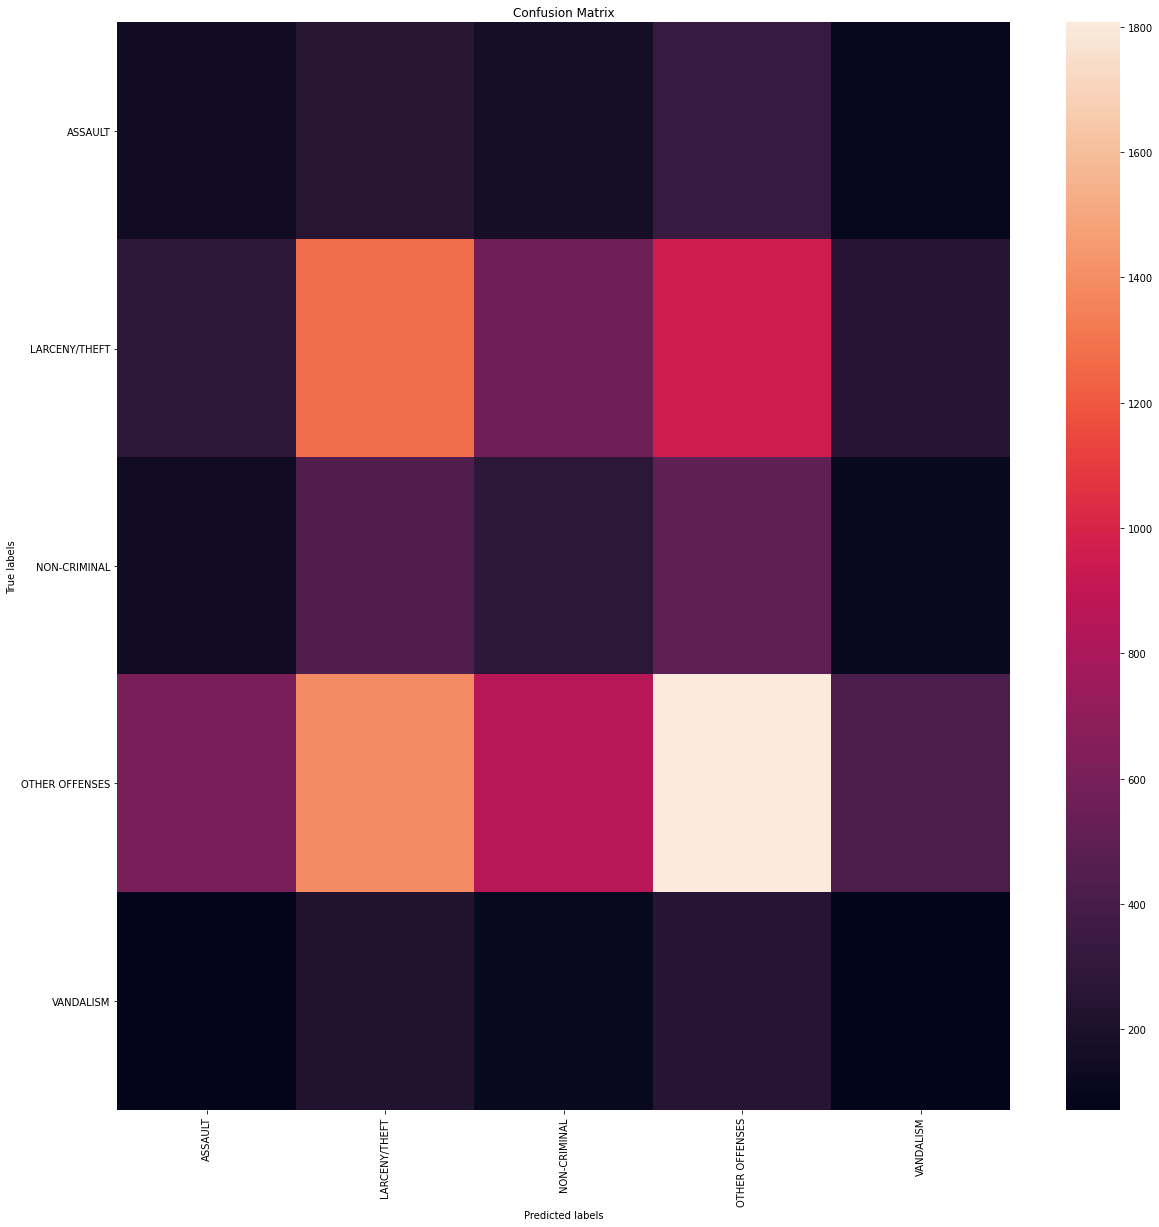

In [39]:
 modeling(dfm[['Category','DayOfWeek','X','Y','WeekOfYear','Month','Hour','Block','DayOfYear','DayOfMonth']],9) 


['DayOfWeek', '0.0840']
['X', '0.1897']
['Y', '0.2043']
['WeekOfYear', '0.0670']
['Month', '0.0324']
['Hour', '0.1372']
['Block', '0.0160']
['DayOfYear', '0.1255']
['DayOfMonth', '0.1439']
                precision    recall  f1-score   support

       ASSAULT       0.09      0.14      0.11       974
 LARCENY/THEFT       0.38      0.44      0.41      3699
  NON-CRIMINAL       0.14      0.22      0.18      1475
OTHER OFFENSES       0.48      0.32      0.39      5417
     VANDALISM       0.06      0.06      0.06       773

      accuracy                           0.32     12338
     macro avg       0.23      0.24      0.23     12338
  weighted avg       0.35      0.32      0.33     12338



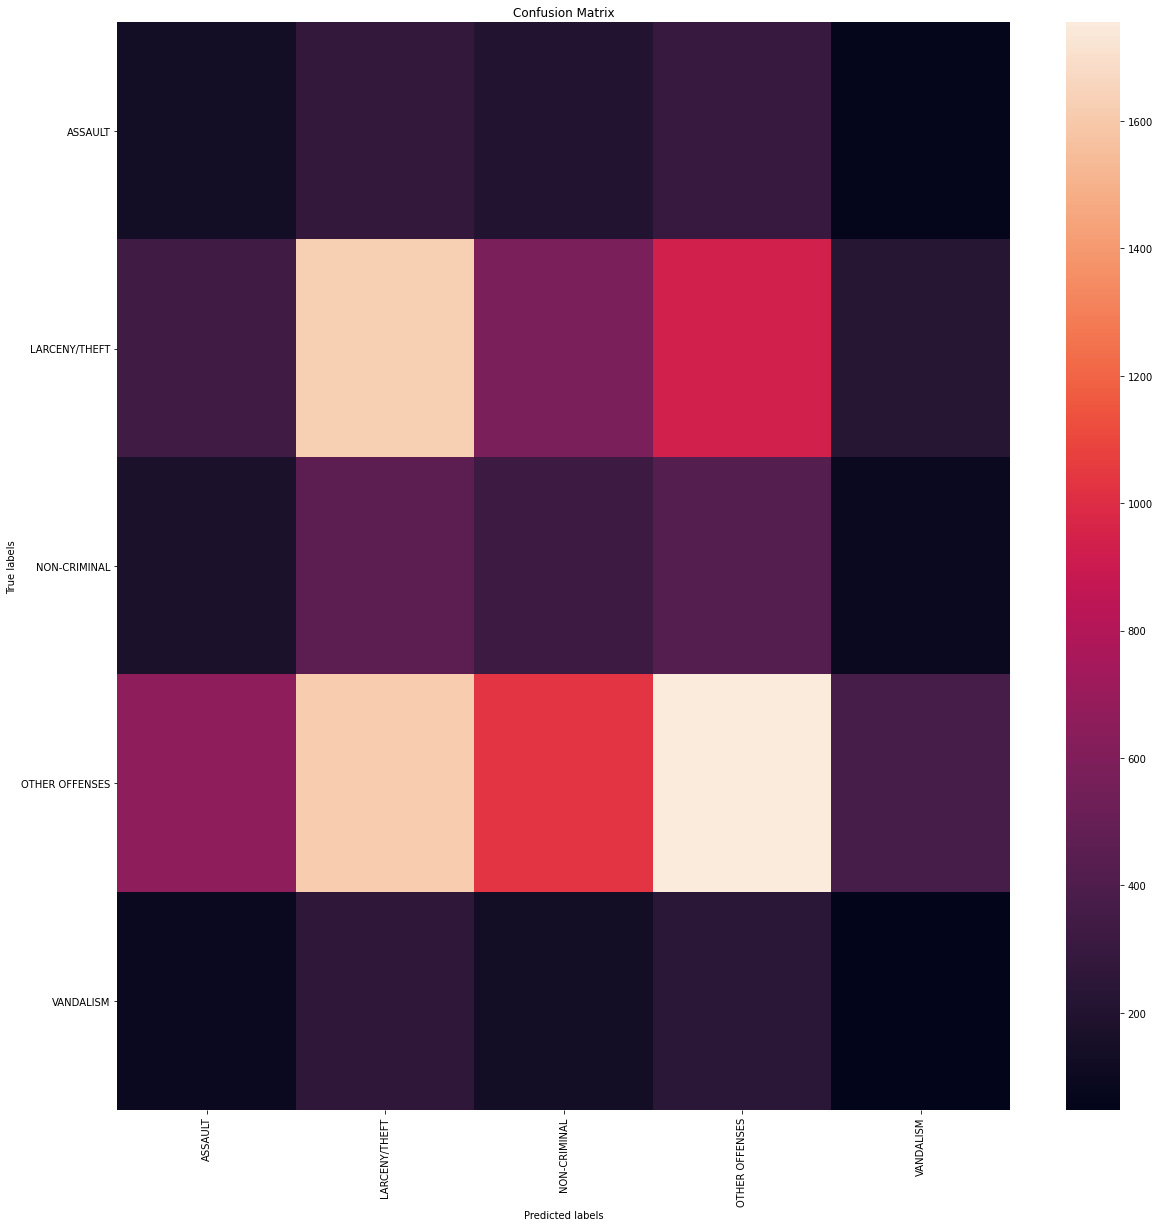

In [40]:
 modeling(dfm[['Category','DayOfWeek','X','Y','WeekOfYear','Month','Hour','Block','DayOfYear','DayOfMonth']],10) 

['DayOfWeek', '0.0877']
['X', '0.1816']
['Y', '0.1974']
['WeekOfYear', '0.0707']
['Month', '0.0336']
['Hour', '0.1387']
['Block', '0.0171']
['DayOfYear', '0.1262']
['DayOfMonth', '0.1470']
                precision    recall  f1-score   support

       ASSAULT       0.11      0.14      0.12       998
 LARCENY/THEFT       0.36      0.42      0.38      3420
  NON-CRIMINAL       0.14      0.19      0.16      1315
OTHER OFFENSES       0.50      0.37      0.43      5224
     VANDALISM       0.07      0.08      0.08       763

      accuracy                           0.33     11720
     macro avg       0.24      0.24      0.23     11720
  weighted avg       0.36      0.33      0.34     11720



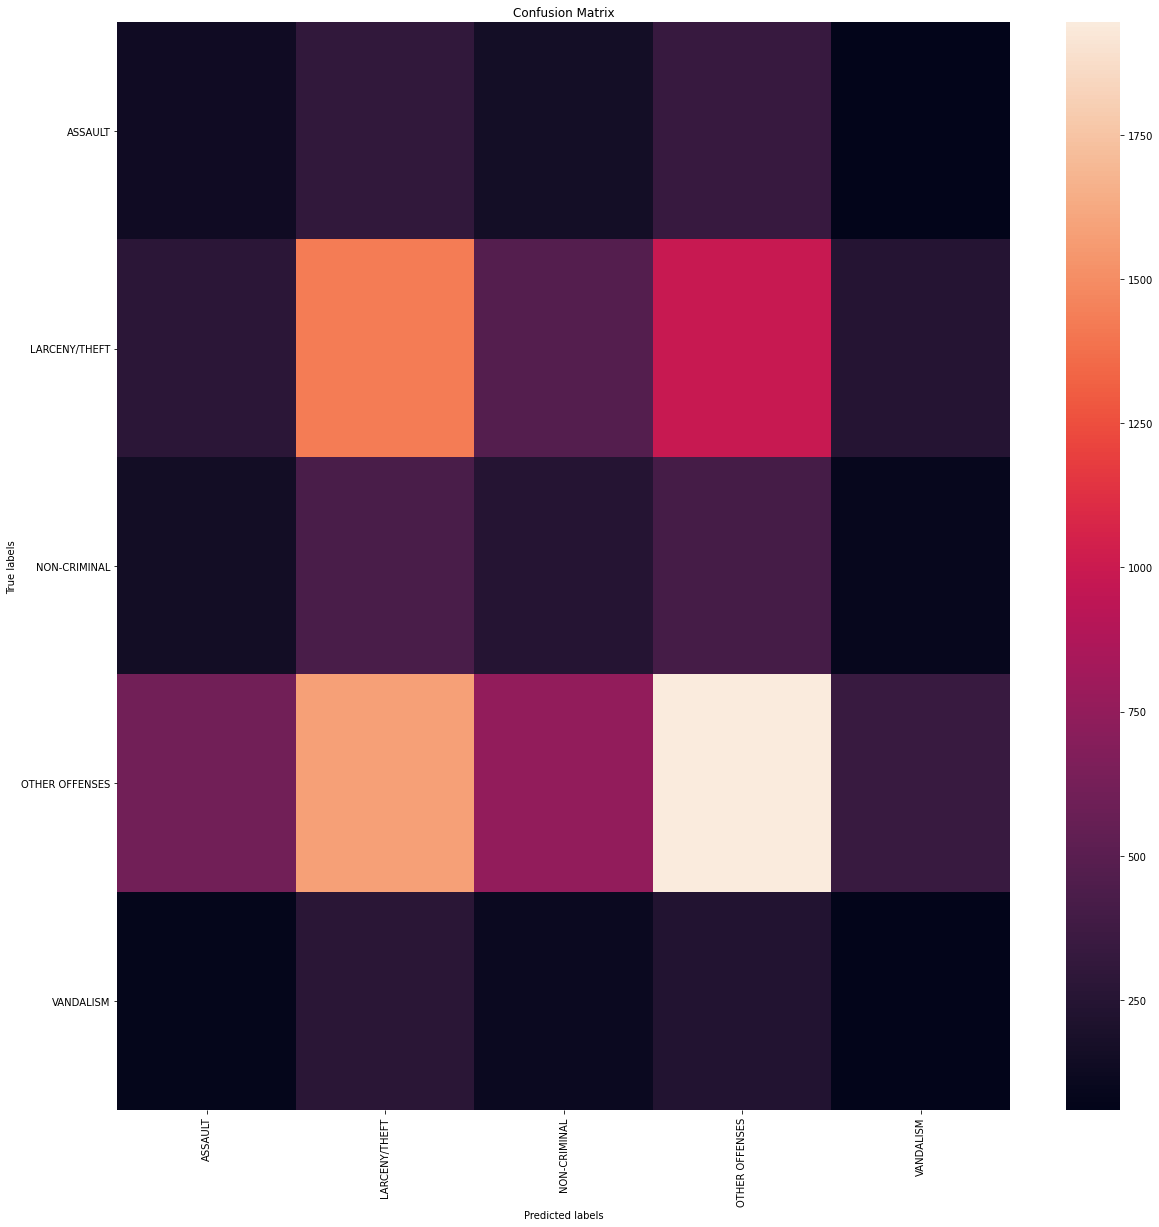

In [41]:
 modeling(dfm[['Category','DayOfWeek','X','Y','WeekOfYear','Month','Hour','Block','DayOfYear','DayOfMonth']],11) 

['DayOfWeek', '0.0863']
['X', '0.1860']
['Y', '0.1941']
['WeekOfYear', '0.0720']
['Month', '0.0359']
['Hour', '0.1342']
['Block', '0.0150']
['DayOfYear', '0.1285']
['DayOfMonth', '0.1479']
                precision    recall  f1-score   support

       ASSAULT       0.09      0.11      0.10       952
 LARCENY/THEFT       0.38      0.41      0.39      3794
  NON-CRIMINAL       0.13      0.15      0.14      1454
OTHER OFFENSES       0.45      0.36      0.40      5022
     VANDALISM       0.09      0.10      0.09       814

      accuracy                           0.32     12036
     macro avg       0.23      0.23      0.23     12036
  weighted avg       0.34      0.32      0.32     12036



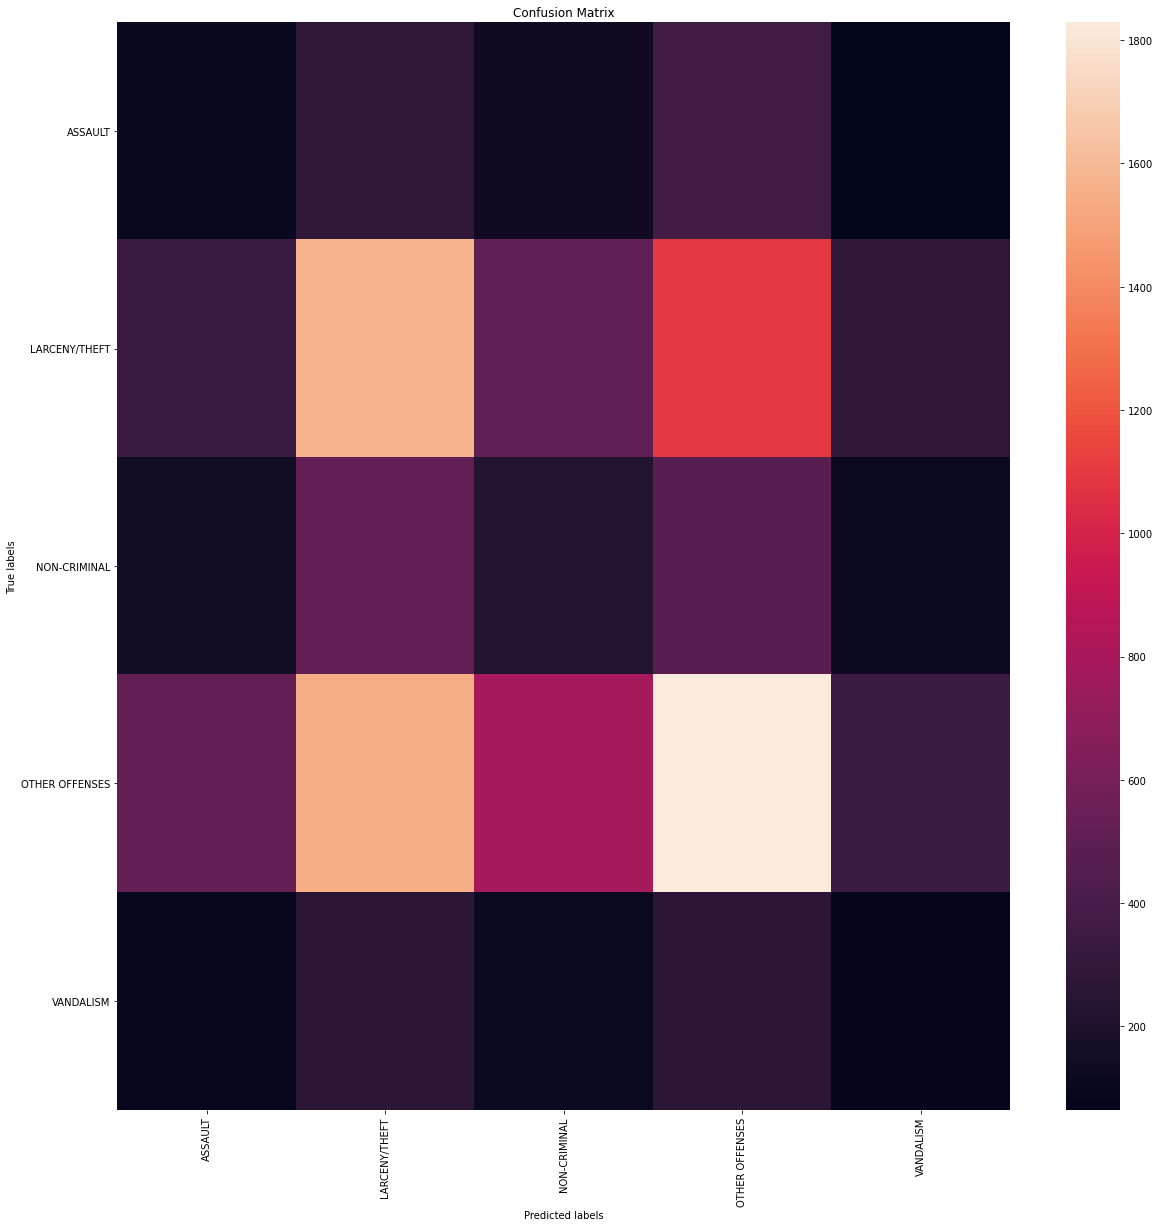

In [42]:
 modeling(dfm[['Category','DayOfWeek','X','Y','WeekOfYear','Month','Hour','Block','DayOfYear','DayOfMonth']],12) 